<a href="https://colab.research.google.com/github/tantiboro/vaki/blob/main/apply_kiva_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import the Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Nov 23 03:04:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/New Folder/loans.csv')

In [6]:
# How many columns and rows are they in the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 2086700 rows and 34 columns.


In [7]:
df.columns = [i.replace(' ', '_').lower() for i in df.columns]

In [8]:
print(f'The columns of the dataset are: {df.columns.to_list()}')

The columns of the dataset are: ['loan_id', 'loan_name', 'original_language', 'description', 'description_translated', 'funded_amount', 'loan_amount', 'status', 'image_id', 'video_id', 'activity_name', 'sector_name', 'loan_use', 'country_code', 'country_name', 'town_name', 'currency_policy', 'currency_exchange_coverage_rate', 'currency', 'partner_id', 'posted_time', 'planned_expiration_time', 'disburse_time', 'raised_time', 'lender_term', 'num_lenders_total', 'num_journal_entries', 'num_bulk_entries', 'tags', 'borrower_names', 'borrower_genders', 'borrower_pictured', 'repayment_interval', 'distribution_model']


In [9]:
df_truncated = df[['description_translated', 'loan_amount','sector_name', 'loan_use','status']]
df_truncated.head()

,description_translated,loan_amount,sector_name,loan_use,status
0,NaN,1100.0,Retail,to purchase additional inventory and working capital,funded
1,"Rosa works hard to support her family. Rosa is married and has a general store business in the Philippines.<br /><br />Rosa requested a PHP 5,000 loan through NWTF to buy more groceries to sell in her general store.<br /><br />Rosa has been in this business for 10 years now.<br /><br />Rosa would like to save enough to provide a secure future for her family.",125.0,Retail,to buy more groceries to sell in her general store,funded
2,"Warlita is a widowed woman with two children. She is a very hardworking entrepreneur. She is 54 years old and has one child currently in school.<br /><br />Warlita has a buy-and-sell banana business in the Philippines. She has requested a PHP 8,000 loan amount through NWTF to buy more bananas to sell and other supplies needed in her business. She has been in this business for three years. In the future, Warlita would like to save enough to provide a secure future for her family.",175.0,Food,to buy more bananas to sell and other supplies needed in her business.,funded
3,"Faafofola is a 40-year-old married woman with three children. She runs a small business of planting taro and banana and sell them in her community to earn a living. She has four years of experience with this business. <br /><br />Faafofola works very hard to please her customers, and she is also well known in her community because of her good products. Faafofola needs a loan to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake to help take her business to the next level. <br /><br />Her dream is that one day she will earn more profit to buy a vehicle to deliver her products to the market. She became a member of SPBD in 2013.",1400.0,Agriculture,"to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake.",funded
4,"Veronique is a widow, …[text missing] years old, with seven children in her care. In order to provide for herself and her children, she has started a business selling alcoholic beverages, such as various brands of beer: 33 Export, Mutzig, Amstel, Castel, Guinness, etc. She also sells food. She is seeking a loan that will allow her to keep a steady stock, avoid depleting her stock, and, if possible, take advantage of some discounts from the breweries. She plans to use her earnings to strengthen her business further and increase her sales level. \r\n",425.0,Food,"to increase her stock of various brands of beer: 33 Export, Mutzig, Amstel, etc",funded


In [10]:
df_reduced = df_truncated.dropna()

In [11]:
df_reduced['status'].value_counts()

funded         1537208
expired          86607
fundRaising       7564
Name: status, dtype: int64

In [12]:
print(f'The dataset has {df_reduced.shape[0]} rows and {df_reduced.shape[1]} columns.')

The dataset has 1631379 rows and 5 columns.


In [13]:
df_red = df_reduced[df_reduced.status != 'fundRaising']

In [14]:
#Check the status of all the loans
df_red['status'].value_counts()

funded     1537208
expired      86607
Name: status, dtype: int64

In [15]:
df_red.head()

,description_translated,loan_amount,sector_name,loan_use,status
1,"Rosa works hard to support her family. Rosa is married and has a general store business in the Philippines.<br /><br />Rosa requested a PHP 5,000 loan through NWTF to buy more groceries to sell in her general store.<br /><br />Rosa has been in this business for 10 years now.<br /><br />Rosa would like to save enough to provide a secure future for her family.",125.0,Retail,to buy more groceries to sell in her general store,funded
2,"Warlita is a widowed woman with two children. She is a very hardworking entrepreneur. She is 54 years old and has one child currently in school.<br /><br />Warlita has a buy-and-sell banana business in the Philippines. She has requested a PHP 8,000 loan amount through NWTF to buy more bananas to sell and other supplies needed in her business. She has been in this business for three years. In the future, Warlita would like to save enough to provide a secure future for her family.",175.0,Food,to buy more bananas to sell and other supplies needed in her business.,funded
3,"Faafofola is a 40-year-old married woman with three children. She runs a small business of planting taro and banana and sell them in her community to earn a living. She has four years of experience with this business. <br /><br />Faafofola works very hard to please her customers, and she is also well known in her community because of her good products. Faafofola needs a loan to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake to help take her business to the next level. <br /><br />Her dream is that one day she will earn more profit to buy a vehicle to deliver her products to the market. She became a member of SPBD in 2013.",1400.0,Agriculture,"to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake.",funded
4,"Veronique is a widow, …[text missing] years old, with seven children in her care. In order to provide for herself and her children, she has started a business selling alcoholic beverages, such as various brands of beer: 33 Export, Mutzig, Amstel, Castel, Guinness, etc. She also sells food. She is seeking a loan that will allow her to keep a steady stock, avoid depleting her stock, and, if possible, take advantage of some discounts from the breweries. She plans to use her earnings to strengthen her business further and increase her sales level. \r\n",425.0,Food,"to increase her stock of various brands of beer: 33 Export, Mutzig, Amstel, etc",funded
5,"Sabitu is married and lives with his family in an ordinary mud house in a small village in Kaduna state. In his community, farming is the primary occupation and, like many diligent smallholders, he dreams of scaling up his farm business.<br /><br />Sabitu is returning to work with Babban Gona this season, as he will get access to better-yielding seeds, fertilizers, and other essential farm inputs that will boost his yield. Apart from increasing Sabitu’s yield to ensure that his family never goes hungry, this loan will also help him earn up to three times in net income from selling his maize. Since he first joined Babban Gona in 2015, his happiest memory was buying a car.<br /><br />With lenders’ support to grow his farming business, Sabitu is looking forward to a bountiful harvest. Sabitu plans to use the profits from this season’s harvest to pay his children's school fees.",325.0,Agriculture,to buy fertilizers and seeds to get a good yield and grow his farming business.,funded


In [ ]:
#print(data.dtypes)

In [16]:
print(f'The dataset has the following colums: {df_red.columns.to_list()}.')

The dataset has the following colums: ['description_translated', 'loan_amount', 'sector_name', 'loan_use', 'status'].


In [17]:
df_ = df_red.copy()
df_['status'].value_counts()

funded     1537208
expired      86607
Name: status, dtype: int64

In [18]:
df_.head()

,description_translated,loan_amount,sector_name,loan_use,status
1,"Rosa works hard to support her family. Rosa is married and has a general store business in the Philippines.<br /><br />Rosa requested a PHP 5,000 loan through NWTF to buy more groceries to sell in her general store.<br /><br />Rosa has been in this business for 10 years now.<br /><br />Rosa would like to save enough to provide a secure future for her family.",125.0,Retail,to buy more groceries to sell in her general store,funded
2,"Warlita is a widowed woman with two children. She is a very hardworking entrepreneur. She is 54 years old and has one child currently in school.<br /><br />Warlita has a buy-and-sell banana business in the Philippines. She has requested a PHP 8,000 loan amount through NWTF to buy more bananas to sell and other supplies needed in her business. She has been in this business for three years. In the future, Warlita would like to save enough to provide a secure future for her family.",175.0,Food,to buy more bananas to sell and other supplies needed in her business.,funded
3,"Faafofola is a 40-year-old married woman with three children. She runs a small business of planting taro and banana and sell them in her community to earn a living. She has four years of experience with this business. <br /><br />Faafofola works very hard to please her customers, and she is also well known in her community because of her good products. Faafofola needs a loan to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake to help take her business to the next level. <br /><br />Her dream is that one day she will earn more profit to buy a vehicle to deliver her products to the market. She became a member of SPBD in 2013.",1400.0,Agriculture,"to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake.",funded
4,"Veronique is a widow, …[text missing] years old, with seven children in her care. In order to provide for herself and her children, she has started a business selling alcoholic beverages, such as various brands of beer: 33 Export, Mutzig, Amstel, Castel, Guinness, etc. She also sells food. She is seeking a loan that will allow her to keep a steady stock, avoid depleting her stock, and, if possible, take advantage of some discounts from the breweries. She plans to use her earnings to strengthen her business further and increase her sales level. \r\n",425.0,Food,"to increase her stock of various brands of beer: 33 Export, Mutzig, Amstel, etc",funded
5,"Sabitu is married and lives with his family in an ordinary mud house in a small village in Kaduna state. In his community, farming is the primary occupation and, like many diligent smallholders, he dreams of scaling up his farm business.<br /><br />Sabitu is returning to work with Babban Gona this season, as he will get access to better-yielding seeds, fertilizers, and other essential farm inputs that will boost his yield. Apart from increasing Sabitu’s yield to ensure that his family never goes hungry, this loan will also help him earn up to three times in net income from selling his maize. Since he first joined Babban Gona in 2015, his happiest memory was buying a car.<br /><br />With lenders’ support to grow his farming business, Sabitu is looking forward to a bountiful harvest. Sabitu plans to use the profits from this season’s harvest to pay his children's school fees.",325.0,Agriculture,to buy fertilizers and seeds to get a good yield and grow his farming business.,funded


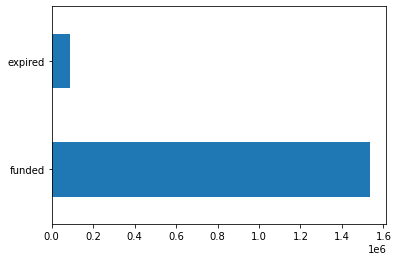

In [19]:
df_['status'].value_counts().plot(kind='barh')

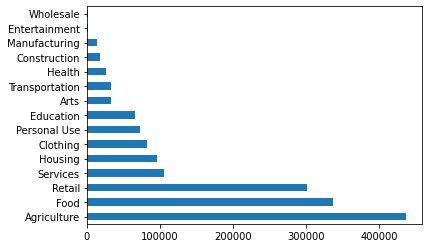

In [20]:
df_['sector_name'].value_counts().plot(kind='barh')

In [21]:
bins = np.array([0, 200, 400, 600, 1000, 100000, 500000])

In [22]:
labels = pd.cut(df_.loan_amount, bins)

In [23]:
labels

1                (0, 200]
2                (0, 200]
3          (1000, 100000]
4              (400, 600]
5              (200, 400]
                ...      
2086695        (400, 600]
2086696          (0, 200]
2086697        (400, 600]
2086698    (1000, 100000]
2086699    (1000, 100000]
Name: loan_amount, Length: 1623815, dtype: category
Categories (6, interval[int64]): [(0, 200] < (200, 400] < (400, 600] < (600, 1000] <
                                  (1000, 100000] < (100000, 500000]]

In [24]:
grouped = df_.groupby(['status', labels])

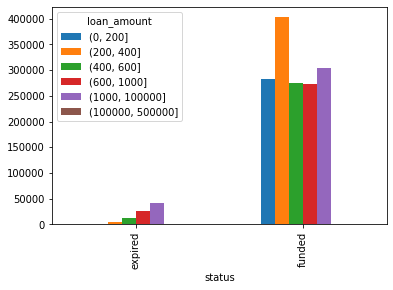

In [25]:
grouped.size().unstack().plot(kind='bar')

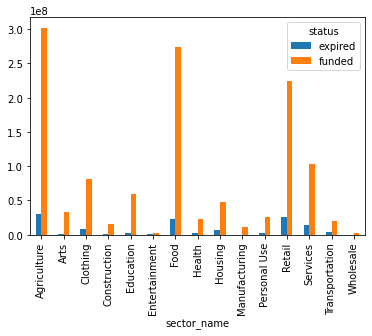

In [26]:
by_sector_name = df_.pivot_table('loan_amount', index='sector_name', columns='status', aggfunc='sum')
by_sector_name.plot(kind='bar', figsize=(6,4))

In [27]:
by_sector_name_df = pd.DataFrame(by_sector_name)
by_sector_name_df.head()

status,expired,funded
sector_name,,
Agriculture,30631100.0,302349875.0
Arts,793425.0,33315025.0
Clothing,8651650.0,81782225.0
Construction,1492475.0,15502550.0
Education,2178600.0,58918875.0


In [28]:
df_.groupby('status').mean()

,loan_amount
status,
expired,1419.370259
funded,796.813346


In [29]:
learning_data = df_.copy()
learning_data['status'] = df_.apply(lambda x: 1 if x.status == 'funded' else 0, axis=1)

learning_data.head()

,description_translated,loan_amount,sector_name,loan_use,status
1,"Rosa works hard to support her family. Rosa is married and has a general store business in the Philippines.<br /><br />Rosa requested a PHP 5,000 loan through NWTF to buy more groceries to sell in her general store.<br /><br />Rosa has been in this business for 10 years now.<br /><br />Rosa would like to save enough to provide a secure future for her family.",125.0,Retail,to buy more groceries to sell in her general store,1
2,"Warlita is a widowed woman with two children. She is a very hardworking entrepreneur. She is 54 years old and has one child currently in school.<br /><br />Warlita has a buy-and-sell banana business in the Philippines. She has requested a PHP 8,000 loan amount through NWTF to buy more bananas to sell and other supplies needed in her business. She has been in this business for three years. In the future, Warlita would like to save enough to provide a secure future for her family.",175.0,Food,to buy more bananas to sell and other supplies needed in her business.,1
3,"Faafofola is a 40-year-old married woman with three children. She runs a small business of planting taro and banana and sell them in her community to earn a living. She has four years of experience with this business. <br /><br />Faafofola works very hard to please her customers, and she is also well known in her community because of her good products. Faafofola needs a loan to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake to help take her business to the next level. <br /><br />Her dream is that one day she will earn more profit to buy a vehicle to deliver her products to the market. She became a member of SPBD in 2013.",1400.0,Agriculture,"to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake.",1
4,"Veronique is a widow, …[text missing] years old, with seven children in her care. In order to provide for herself and her children, she has started a business selling alcoholic beverages, such as various brands of beer: 33 Export, Mutzig, Amstel, Castel, Guinness, etc. She also sells food. She is seeking a loan that will allow her to keep a steady stock, avoid depleting her stock, and, if possible, take advantage of some discounts from the breweries. She plans to use her earnings to strengthen her business further and increase her sales level. \r\n",425.0,Food,"to increase her stock of various brands of beer: 33 Export, Mutzig, Amstel, etc",1
5,"Sabitu is married and lives with his family in an ordinary mud house in a small village in Kaduna state. In his community, farming is the primary occupation and, like many diligent smallholders, he dreams of scaling up his farm business.<br /><br />Sabitu is returning to work with Babban Gona this season, as he will get access to better-yielding seeds, fertilizers, and other essential farm inputs that will boost his yield. Apart from increasing Sabitu’s yield to ensure that his family never goes hungry, this loan will also help him earn up to three times in net income from selling his maize. Since he first joined Babban Gona in 2015, his happiest memory was buying a car.<br /><br />With lenders’ support to grow his farming business, Sabitu is looking forward to a bountiful harvest. Sabitu plans to use the profits from this season’s harvest to pay his children's school fees.",325.0,Agriculture,to buy fertilizers and seeds to get a good yield and grow his farming business.,1


In [ ]:
#count_class_1, count_class_0 = learning_data['status'].value_counts()

In [ ]:
# df_class_0 = learning_data[learning_data['status'] == 0]
# df_class_1 = learning_data[learning_data['status'] == 1]

In [ ]:
# print(count_class_0)
# print(count_class_1)

86607
1537208


Because of the difference between class 0 and class 1, we downgrade our dataset to the smallest class to avoid bias


In [ ]:
# df_class_1_under = df_class_1.sample(count_class_0)
# df_class_1_under.shape
# df_down_size = pd.concat([df_class_1_under, df_class_0], axis=0)
# print ('Random under-Sampling')
# print(df_down_size.status.value_counts())

Random under-Sampling
1    86607
0    86607
Name: status, dtype: int64


In [30]:
sector_df = learning_data[['loan_amount', 'sector_name', 'status']]
sector_df.to_csv('sector.csv', index=False)

In [31]:
sector_df['status'].value_counts()

1    1537208
0      86607
Name: status, dtype: int64

In [32]:
application_df = learning_data[['loan_use', 'description_translated', 'status']]
application_df.to_csv('application.csv', index=False)

In [33]:
application_df['status'].value_counts()

1    1537208
0      86607
Name: status, dtype: int64

In [34]:
cat_data = sector_df[['sector_name']]
cat_data.nunique()

sector_name    15
dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_data_1hot = cat_encoder.fit_transform(cat_data)
cat_data_1hot

<1623815x15 sparse matrix of type '<class 'numpy.float64'>'
	with 1623815 stored elements in Compressed Sparse Row format>

In [36]:
cat_data_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
df3 = pd.DataFrame(cat_data_1hot.toarray())
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df3.dtypes

In [38]:
new_df = pd.concat([sector_df[['loan_amount', 'status']].reset_index(drop=True), df3], axis=1)
new_df.head()

,loan_amount,status,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,125.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,175.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1400.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,425.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,325.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#newdf['status'].value_counts()

In [39]:
target = new_df['status']
data_features = new_df.drop('status', axis=1)

In [40]:
target.value_counts()

1    1537208
0      86607
Name: status, dtype: int64

In [41]:
count_class_1, count_class_0 = new_df['status'].value_counts()

In [44]:
df_class_0 = new_df[new_df['status'] == 0]
df_class_1 = new_df[new_df['status'] == 1]

In [45]:
print(count_class_0)
print(count_class_1)

86607
1537208


In [46]:
# Undersampling 1_class and concat the dataframe to for a new dataframe
df_class_1_under = df_class_1.sample(count_class_0)
df_class_1_under.shape
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
print ('Random under-Sampling')
print(df_test_under.status.value_counts())

Random under-Sampling
1    86607
0    86607
Name: status, dtype: int64


In [47]:
df_test_under.head()

,loan_amount,status,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1002522,1425.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1366401,200.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
470977,125.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
146466,275.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
979840,1325.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
features= df_test_under.drop(columns='status')
labels = df_test_under['status']

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [50]:
#Define a function to run and evaluate the model
def rf_m(X_train, y_train, X_test):
  rf = RandomForestClassifier()
  rf_model = rf.fit(X_train, y_train)
  y_pred = rf_model.predict(X_test)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  print('Precision: {} / Recall: {}'.format(round(precision, 3), round(recall, 3)))
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  return y_pred 

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [51]:
y_pred = rf_m(X_train, y_train, X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Precision: 0.794 / Recall: 0.615
[[14521  2768]
 [ 6680 10674]]
              precision    recall  f1-score   support

           0       0.68      0.84      0.75     17289
           1       0.79      0.62      0.69     17354

    accuracy                           0.73     34643
   macro avg       0.74      0.73      0.72     34643
weighted avg       0.74      0.73      0.72     34643



In [52]:
import joblib
# save
joblib.dump(rf_m, "my_Random_Forest.joblib")

['my_Random_Forest.joblib']

In [53]:
# New Machine Learning data on how the loan use can affect the funding
loan_data = application_df.dropna()
loan_data.isnull().sum()

loan_use                  0
description_translated    0
status                    0
dtype: int64

In [54]:
loan_data['status'].value_counts()

1    1537208
0      86607
Name: status, dtype: int64

In [2]:
count_class_1, count_class_0 = loan_data['status'].value_counts()

In [55]:
loan_data_class_0 = loan_data[loan_data['status'] == 0]
loan_data_class_1 = loan_data[loan_data['status'] == 1]

In [56]:
print(count_class_0)
print(count_class_1)

86607
1537208


In [59]:
df_loan_class_0_over = loan_data_class_0.sample(count_class_1, replace=True)
df_loan_class_0_over.shape
df_loan_over = pd.concat([df_loan_class_0_over, loan_data_class_1], axis=0)
print ('Random over-Sampling')
print(df_loan_over.status.value_counts())

Random over-Sampling
1    1537208
0    1537208
Name: status, dtype: int64


In [60]:
loan_data_3 = df_loan_over[['description_translated', 'status']]
loan_data_4 = df_loan_over[['loan_use', 'status']]

In [61]:
loan_data_3.shape

(3074416, 2)

In [62]:
loan_data_4.shape

(3074416, 2)

In [63]:
pd.set_option('display.max_colwidth', None)
loan_df = loan_data
loan_df.head()

,loan_use,description_translated,status
1,to buy more groceries to sell in her general store,"Rosa works hard to support her family. Rosa is married and has a general store business in the Philippines.<br /><br />Rosa requested a PHP 5,000 loan through NWTF to buy more groceries to sell in her general store.<br /><br />Rosa has been in this business for 10 years now.<br /><br />Rosa would like to save enough to provide a secure future for her family.",1
2,to buy more bananas to sell and other supplies needed in her business.,"Warlita is a widowed woman with two children. She is a very hardworking entrepreneur. She is 54 years old and has one child currently in school.<br /><br />Warlita has a buy-and-sell banana business in the Philippines. She has requested a PHP 8,000 loan amount through NWTF to buy more bananas to sell and other supplies needed in her business. She has been in this business for three years. In the future, Warlita would like to save enough to provide a secure future for her family.",1
3,"to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake.","Faafofola is a 40-year-old married woman with three children. She runs a small business of planting taro and banana and sell them in her community to earn a living. She has four years of experience with this business. <br /><br />Faafofola works very hard to please her customers, and she is also well known in her community because of her good products. Faafofola needs a loan to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake to help take her business to the next level. <br /><br />Her dream is that one day she will earn more profit to buy a vehicle to deliver her products to the market. She became a member of SPBD in 2013.",1
4,"to increase her stock of various brands of beer: 33 Export, Mutzig, Amstel, etc","Veronique is a widow, …[text missing] years old, with seven children in her care. In order to provide for herself and her children, she has started a business selling alcoholic beverages, such as various brands of beer: 33 Export, Mutzig, Amstel, Castel, Guinness, etc. She also sells food. She is seeking a loan that will allow her to keep a steady stock, avoid depleting her stock, and, if possible, take advantage of some discounts from the breweries. She plans to use her earnings to strengthen her business further and increase her sales level. \r\n",1
5,to buy fertilizers and seeds to get a good yield and grow his farming business.,"Sabitu is married and lives with his family in an ordinary mud house in a small village in Kaduna state. In his community, farming is the primary occupation and, like many diligent smallholders, he dreams of scaling up his farm business.<br /><br />Sabitu is returning to work with Babban Gona this season, as he will get access to better-yielding seeds, fertilizers, and other essential farm inputs that will boost his yield. Apart from increasing Sabitu’s yield to ensure that his family never goes hungry, this loan will also help him earn up to three times in net income from selling his maize. Since he first joined Babban Gona in 2015, his happiest memory was buying a car.<br /><br />With lenders’ support to grow his farming business, Sabitu is looking forward to a bountiful harvest. Sabitu plans to use the profits from this season’s harvest to pay his children's school fees.",1


In [ ]:
#loan_df.shape

RNN:Implement a basic RNN

Read in, Clean and split the data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 1000)

In [64]:
#Read the data in
#data_df = learning_data.drop(columns=['sector_name'])
features = loan_data_3['description_translated']
labels = loan_data_3['status']
labels.value_counts()

1    1537208
0    1537208
Name: status, dtype: int64

In [ ]:
#loan_data.to_csv('applications.csv', index=False)

In [65]:
#Spliting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# # Install Keras
# !pip install -U keras==2.6.0

In [66]:
# Import the tools needed for keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using Tensorflow backend

In [67]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [68]:
#Use that tokenizer to transform the data in the training 
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [69]:
X_train_seq[0][:15]

[1713, 13309, 6, 762, 20, 29, 2, 41, 17, 12, 154, 13, 41, 8, 12]

In [70]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [71]:
X_train_seq_padded[0]

array([   3, 4410,  289,    2,   14,  408, 3278,  247,    8,    3,  225,
         10,   10,   13,    6,  116,    4,   15,    1,   28, 3835,  107,
         11, 2939,    2,  107,   12, 1173,    8,   19,  205,   13,   21,
        120,    4,  100,   33,   11,  447,    2,   12,   26,   13,    6,
          4, 2348,  700,    9, 1448, 1388], dtype=int32)

Building the model


In [72]:
# Import the tools needed for keras and define the functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  recall = true_positives / (predicted_positives + K.epsilon())
  return recall


In [73]:
#Construct a RNN model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          12493376  
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,502,785
Trainable params: 12,502,785
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [75]:
# Define  a model
import tensorflow as tf
from tensorflow import keras

def create_model():
    model = keras.models.Sequential([
                                    keras.layers.Embedding(len(tokenizer.index_word)+1, 32),
                                    keras.layers.LSTM(32, dropout=0, recurrent_dropout=0),
                                    keras.layers.Dense(32, activation='relu'),
                                    keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', precision_m, recall_m])
    return model
 

# Create a basic model instance
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          12493376  
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,502,785
Trainable params: 12,502,785
Non-trainable params: 0
_________________________________________________________________


In [76]:
#Check first to see if file exits already
# if not, the model is saved to disk
import os.path
if os.path.isfile('models/kiva_over_model.h5') is False:
    model.save('models/kiva_over_model.h5')

In [78]:
history = model.fit(X_train_seq_padded, y_train,
                    batch_size=32, epochs=5,
                    validation_data=(X_test_seq_padded, y_test)) 

Epoch 1/5
76861/76861 [==============================] - 583s 8ms/step - loss: 0.4051 - accuracy: 0.8113 - precision_m: 0.8524 - recall_m: 0.7539 - val_loss: 0.3121 - val_accuracy: 0.8643 - val_precision_m: 0.9119 - val_recall_m: 0.8064
Epoch 2/5
76861/76861 [==============================] - 578s 8ms/step - loss: 0.2530 - accuracy: 0.8950 - precision_m: 0.9308 - recall_m: 0.8540 - val_loss: 0.2268 - val_accuracy: 0.9086 - val_precision_m: 0.9476 - val_recall_m: 0.8648
Epoch 3/5
76861/76861 [==============================] - 576s 7ms/step - loss: 0.1862 - accuracy: 0.9270 - precision_m: 0.9587 - recall_m: 0.8926 - val_loss: 0.1877 - val_accuracy: 0.9274 - val_precision_m: 0.9657 - val_recall_m: 0.8861
Epoch 4/5
76861/76861 [==============================] - 577s 8ms/step - loss: 0.1511 - accuracy: 0.9429 - precision_m: 0.9701 - recall_m: 0.9141 - val_loss: 0.1640 - val_accuracy: 0.9385 - val_precision_m: 0.9716 - val_recall_m: 0.9032
Epoch 5/5
76861/76861 [=============================

Clean up text


Lemmatize text

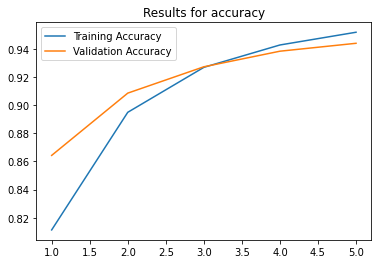

<Figure size 432x288 with 0 Axes>

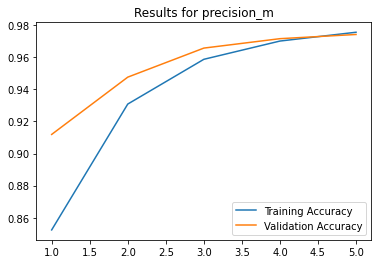

<Figure size 432x288 with 0 Axes>

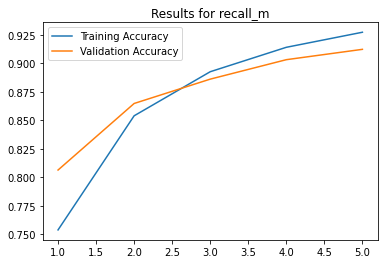

<Figure size 432x288 with 0 Axes>

In [79]:
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()
    plt.savefig('fig_rnn1.png')

In [ ]:
# loan_data_2 = df_loan_under[['loan_use', 'status']]
# loan_df3 = loan_data_2.copy()

In [81]:
#Read the data in
#data_df = learning_data.drop(columns=['sector_name'])
features = loan_data_4['loan_use']
labels = loan_data_4['status']
labels.value_counts()

1    1537208
0    1537208
Name: status, dtype: int64

In [82]:
#Spliting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [83]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [84]:
#Use that tokenizer to transform the data in the training 
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [85]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [86]:
X_train_seq_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   3, 723,  15,   4, 703,   2,  15,   9, 372], dtype=int32)

In [87]:
# Import the tools needed for keras and define the functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  recall = true_positives / (predicted_positives + K.epsilon())
  return recall

In [88]:
# Define  a model
import tensorflow as tf
from tensorflow import keras

def create_model():
    model = keras.models.Sequential([
                                    keras.layers.Embedding(len(tokenizer.index_word)+1, 32),
                                    keras.layers.LSTM(32, dropout=0, recurrent_dropout=0),
                                    keras.layers.Dense(32, activation='relu'),
                                    keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', precision_m, recall_m])
    return model
 

# Create a basic model instance
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          1171744   
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,181,153
Trainable params: 1,181,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# #Construct a RNN model
# model = Sequential()

# model.add(Embedding(len(tokenizer.index_word)+1, 32))
# model.add(LSTM(32, dropout=0, recurrent_dropout=0))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.summary()

In [ ]:
# # Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy', precision_m, recall_m])

In [89]:
#Check first to see if file exits already
# if not, the model is saved to disk
import os.path
if os.path.isfile('models/loan_use_model.h5') is False:
    model.save('models/loan_use_model.h5')

In [90]:
history = model.fit(X_train_seq_padded, y_train,
                    batch_size=32, epochs=5,
                    validation_data=(X_test_seq_padded, y_test)) 

Epoch 1/5
76861/76861 [==============================] - 436s 6ms/step - loss: 0.5032 - accuracy: 0.7459 - precision_m: 0.7820 - recall_m: 0.6836 - val_loss: 0.4600 - val_accuracy: 0.7762 - val_precision_m: 0.8048 - val_recall_m: 0.7292
Epoch 2/5
76861/76861 [==============================] - 435s 6ms/step - loss: 0.4273 - accuracy: 0.7945 - precision_m: 0.8379 - recall_m: 0.7309 - val_loss: 0.4107 - val_accuracy: 0.8053 - val_precision_m: 0.8473 - val_recall_m: 0.7447
Epoch 3/5
76861/76861 [==============================] - 436s 6ms/step - loss: 0.3853 - accuracy: 0.8186 - precision_m: 0.8648 - recall_m: 0.7558 - val_loss: 0.3858 - val_accuracy: 0.8190 - val_precision_m: 0.8864 - val_recall_m: 0.7315
Epoch 4/5
76861/76861 [==============================] - 435s 6ms/step - loss: 0.3612 - accuracy: 0.8320 - precision_m: 0.8794 - recall_m: 0.7701 - val_loss: 0.3683 - val_accuracy: 0.8305 - val_precision_m: 0.8811 - val_recall_m: 0.7641
Epoch 5/5
76861/76861 [=============================

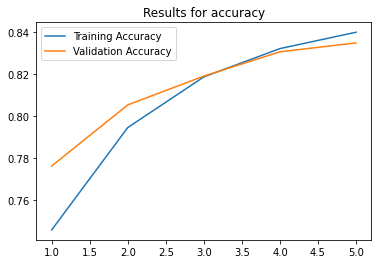

<Figure size 432x288 with 0 Axes>

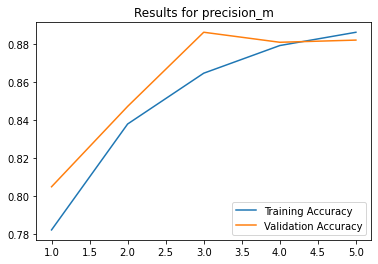

<Figure size 432x288 with 0 Axes>

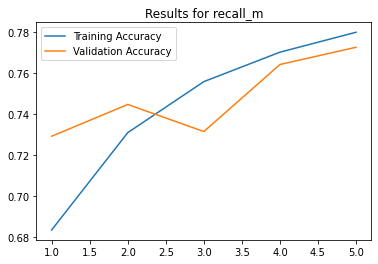

<Figure size 432x288 with 0 Axes>

In [91]:
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()
    plt.savefig('fig_rnn2.png')